In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import date
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn import mixture
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Initializes plotting library and functions for 3D scatter plots 
from pyspark.ml.feature import VectorAssembler
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_classification, make_regression
from sklearn.externals import six
import pandas as pd
import numpy as np
import argparse
import json
import re
import os
import sys
import plotly
import plotly.graph_objs as go

In [3]:
table1= pd.read_csv("table1_total.csv")
table2= pd.read_csv("table2_total.csv")
table3= pd.read_csv("table3_complete.csv")
table4= pd.read_csv("table4.csv")
table5= pd.read_csv("table5_total.csv")
table6= pd.read_csv("table6_complete.csv")


In [4]:
table1.head()#need to get firteam id there

,Unnamed: 0,Unnamed: 0.1,fireteamids2,matchID,mode,standing,team_id,teamscore
0,0,0,7.101892e+18,686386979,42,0.0,17.0,4.0
1,1,1,7.101892e+18,686386979,42,0.0,17.0,4.0
2,2,2,7.101892e+18,686386979,42,0.0,17.0,4.0
3,3,3,7.101892e+18,686386979,42,0.0,17.0,4.0
4,4,4,-5.413836e+18,686386979,42,1.0,16.0,0.0


In [5]:
table1.shape

(400672, 8)

In [7]:
table2.head()#character_level: highest, Grenade,Melee,Super:avg, all features

,Unnamed: 0,Unnamed: 0.1,Ability,Character_Class,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,matchID,playersID,score
0,0,0,0.0,Titan,25,1.0,1.833333,335,2.0,2.0,3.0,3.200000,9.0,2.000000,15.0,1459943405,2305843009283916134,32.0
1,1,1,0.0,Hunter,25,1.0,1.200000,334,0.0,0.0,2.0,1.687500,15.0,1.266667,17.0,1459943405,2305843009260473349,27.0
2,2,2,0.0,Warlock,25,1.0,0.653846,335,0.0,0.0,3.0,1.071429,13.0,0.769231,7.0,1459943405,2305843009265606964,15.0
3,3,3,0.0,Titan,25,0.0,0.406250,335,1.0,1.0,1.0,0.764706,16.0,0.437500,6.0,1459943405,2305843009264488479,13.0
4,4,4,0.0,Hunter,20,0.0,2.555556,290,1.0,1.0,12.0,3.400000,9.0,3.222222,17.0,986171745,2305843009301451364,34.0


In [8]:
len(table2.columns)

18

In [9]:
table2.shape

(315940, 18)

In [10]:
len(set(table2['playersID']))

165569

In [11]:
table3.head()

,fireTeamID,playerID
0,4.116352e+18,2305843009278974423
1,-6.943784e+18,2305843009278974423
2,-3.508653e+17,2305843009278974423
3,2.043913e+17,2305843009269402895
4,-1.083649e+18,2305843009269402895


In [12]:
table4.head()

,Unnamed: 0,reference_id,weapon_name,itemTypeDisplayName,itemTypeAndTierDisplayName,itemType,itemSubType,tierTypeName,equipmentSlotTypeHash,itemCategoryHashes,levels,loreHash_list
0,0,423789,Mythos Hack 4.1,Gauntlets,Rare Gauntlets,2,27,Rare,3.551919e+09,"[23, 46, 20]","[33, 32, 30, 29, 20, 19, 17, 15, 13, 11, 9, 7,...",NaN
1,1,4425887,The Time-Worn Spire,Pulse Rifle,Legendary Pulse Rifle,3,13,Legendary,1.498877e+09,"[2, 1, 7]","[33, 1]",NaN
2,2,7242309,Future War Cult Arsenal,Armor Set,Legendary Armor Set,0,0,Legendary,NaN,[2423200735],[20],NaN
3,3,7242310,Future War Cult Arsenal,Armor Set,Legendary Armor Set,0,0,Legendary,NaN,[2423200735],[20],NaN
4,4,10307688,Wildwood Plate,Chest Armor,Legendary Chest Armor,2,28,Legendary,1.423949e+07,"[22, 47, 20]","[33, 1, 0]",NaN


In [13]:
table5.head()

,Unnamed: 0,Unnamed: 0.1,matchID,playersID,referenceID,uniqueWeaponKills,uniqueWeaponKillsPrecisionKills,uniqueWeaponPrecisionKills
0,0,0,686386979,2305843009261201221,1960218487,3.0,0.000000,0.0
1,1,1,686386979,2305843009261201221,1909527966,2.0,0.000000,0.0
2,2,2,686386979,2305843009267664547,3628991659,11.0,0.181818,2.0
3,3,3,686386979,2305843009269111408,3628991659,9.0,0.666667,6.0
4,4,4,686386979,2305843009269111408,1911843791,2.0,0.000000,0.0


In [23]:
table6.head()

,Date,MatchID,Time
0,2017-09-23,465852274,04:53:37
1,2017-09-13,241332275,03:34:06
2,2017-09-13,240819742,02:50:22
3,2017-11-22,1064084769,02:17:28
4,2017-10-28,883454716,14:45:51


## Reformat tables 

In [14]:
#table1
table1=table1[["matchID","fireteamids2","mode","standing","team_id","teamscore"]]
table1.columns=[["matchID","fireTeamID","mode","standing","team_id","teamscore"]]
table1.head()

,matchID,fireTeamID,mode,standing,team_id,teamscore
0,686386979,7.101892e+18,42,0.0,17.0,4.0
1,686386979,7.101892e+18,42,0.0,17.0,4.0
2,686386979,7.101892e+18,42,0.0,17.0,4.0
3,686386979,7.101892e+18,42,0.0,17.0,4.0
4,686386979,-5.413836e+18,42,1.0,16.0,0.0


In [15]:
#table2
table2=table2.drop('Unnamed: 0',axis=1)

In [16]:
table2.head()

,Unnamed: 0.1,Ability,Character_Class,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,matchID,playersID,score
0,0,0.0,Titan,25,1.0,1.833333,335,2.0,2.0,3.0,3.200000,9.0,2.000000,15.0,1459943405,2305843009283916134,32.0
1,1,0.0,Hunter,25,1.0,1.200000,334,0.0,0.0,2.0,1.687500,15.0,1.266667,17.0,1459943405,2305843009260473349,27.0
2,2,0.0,Warlock,25,1.0,0.653846,335,0.0,0.0,3.0,1.071429,13.0,0.769231,7.0,1459943405,2305843009265606964,15.0
3,3,0.0,Titan,25,0.0,0.406250,335,1.0,1.0,1.0,0.764706,16.0,0.437500,6.0,1459943405,2305843009264488479,13.0
4,4,0.0,Hunter,20,0.0,2.555556,290,1.0,1.0,12.0,3.400000,9.0,3.222222,17.0,986171745,2305843009301451364,34.0


In [17]:
table2["KDA"].describe()

count    315940.000000
mean          1.691857
std           2.302840
min           0.000000
25%           0.550000
50%           1.000000
75%           1.785714
max          31.500000
Name: KDA, dtype: float64

In [18]:
#table3
#good
table3.head()

,fireTeamID,playerID
0,4.116352e+18,2305843009278974423
1,-6.943784e+18,2305843009278974423
2,-3.508653e+17,2305843009278974423
3,2.043913e+17,2305843009269402895
4,-1.083649e+18,2305843009269402895


In [19]:
#table4
table4=table4[["reference_id","weapon_name",'itemTypeDisplayName',"itemTypeAndTierDisplayName","tierTypeName"]]
table4.head()

,reference_id,weapon_name,itemTypeDisplayName,itemTypeAndTierDisplayName,tierTypeName
0,423789,Mythos Hack 4.1,Gauntlets,Rare Gauntlets,Rare
1,4425887,The Time-Worn Spire,Pulse Rifle,Legendary Pulse Rifle,Legendary
2,7242309,Future War Cult Arsenal,Armor Set,Legendary Armor Set,Legendary
3,7242310,Future War Cult Arsenal,Armor Set,Legendary Armor Set,Legendary
4,10307688,Wildwood Plate,Chest Armor,Legendary Chest Armor,Legendary


In [20]:
#table 5
table5.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'matchID', 'playersID', 'referenceID',
       'uniqueWeaponKills', 'uniqueWeaponKillsPrecisionKills',
       'uniqueWeaponPrecisionKills'],
      dtype='object')

In [21]:
table5=table5[['matchID','playersID', 'referenceID', 'uniqueWeaponKills',
       'uniqueWeaponKillsPrecisionKills', 'uniqueWeaponPrecisionKills']]
table5.head()

,matchID,playersID,referenceID,uniqueWeaponKills,uniqueWeaponKillsPrecisionKills,uniqueWeaponPrecisionKills
0,686386979,2305843009261201221,1960218487,3.0,0.000000,0.0
1,686386979,2305843009261201221,1909527966,2.0,0.000000,0.0
2,686386979,2305843009267664547,3628991659,11.0,0.181818,2.0
3,686386979,2305843009269111408,3628991659,9.0,0.666667,6.0
4,686386979,2305843009269111408,1911843791,2.0,0.000000,0.0


### Aggregate the table5 by playersID +ReferenceID 

In [24]:
agg_table5=table5.groupby(['playersID','referenceID']).agg({'uniqueWeaponKills':"mean","uniqueWeaponKillsPrecisionKills":"mean","uniqueWeaponPrecisionKills":"mean"}).reset_index().rename(columns={'uniqueWeaponKills': 'avg_uniqueWeaponKills', 'uniqueWeaponKillsPrecisionKills': 'avg_uniqueWeaponKillsPrecisionKills',"uniqueWeaponPrecisionKills":"avg_uniqueWeaponPrecisionKills"})

In [25]:
agg_table5.head()

,playersID,referenceID,avg_uniqueWeaponKills,avg_uniqueWeaponKillsPrecisionKills,avg_uniqueWeaponPrecisionKills
0,2305843009260294056,1911843791,3.5,0.000000,0.0
1,2305843009260294056,3628991659,8.0,0.466667,4.0
2,2305843009260294077,1879212552,2.0,0.500000,1.0
3,2305843009260294077,2094938673,4.0,0.250000,1.0
4,2305843009260294244,1331482397,3.0,0.333333,1.0


In [27]:
agg_table2=table2.groupby("playersID").agg({'Ability':"mean","Character_Level":"mean",'Grenade':"mean","KDA":"mean",'Lightlevel':"mean","Melee":"mean",'Super':"mean","assists":"mean",'avg_score_per_life':"mean","deaths":"mean",'efficiency':"mean","kills":"mean","score":"mean"}).reset_index()

In [28]:
agg_table2.head()

,playersID,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,score
0,2305843009260294055,0.0,20.0,0.0,0.000000,293.0,0.0,0.0,0.0,0.00000,6.0,0.000000,0.0,0.0
1,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,13.0,1.515152,14.0,28.5
2,2305843009260294077,0.0,20.0,0.0,1.714286,297.0,0.0,1.0,6.0,0.75000,7.0,2.142857,9.0,6.0
3,2305843009260294317,0.0,20.0,0.0,0.833333,301.0,1.0,0.0,3.0,0.90000,9.0,1.000000,6.0,9.0
4,2305843009260294521,0.0,20.0,0.0,0.833333,305.0,0.0,0.0,1.0,1.50000,9.0,0.888889,7.0,15.0


In [29]:
agg_table2_1=pd.merge(agg_table2,table2[["playersID","Character_Class"]],how="left", on='playersID')
agg_table2_1.head()

,playersID,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,score,Character_Class
0,2305843009260294055,0.0,20.0,0.0,0.000000,293.0,0.0,0.0,0.0,0.00000,6.0,0.000000,0.0,0.0,Titan
1,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,13.0,1.515152,14.0,28.5,Hunter
2,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,13.0,1.515152,14.0,28.5,Hunter
3,2305843009260294077,0.0,20.0,0.0,1.714286,297.0,0.0,1.0,6.0,0.75000,7.0,2.142857,9.0,6.0,Titan
4,2305843009260294317,0.0,20.0,0.0,0.833333,301.0,1.0,0.0,3.0,0.90000,9.0,1.000000,6.0,9.0,Hunter


In [30]:
agg_table2=agg_table2_1

### Merge Table2 and 5, primary key = playerID + referenceID 

In [31]:
table2_5=pd.merge(agg_table2,agg_table5,how="inner",left_on="playersID",right_on="playersID")
table2_5.head()

,playersID,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,score,Character_Class,referenceID,avg_uniqueWeaponKills,avg_uniqueWeaponKillsPrecisionKills,avg_uniqueWeaponPrecisionKills
0,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,13.0,1.515152,14.0,28.5,Hunter,1911843791,3.5,0.000000,0.0
1,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,13.0,1.515152,14.0,28.5,Hunter,3628991659,8.0,0.466667,4.0
2,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,13.0,1.515152,14.0,28.5,Hunter,1911843791,3.5,0.000000,0.0
3,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,13.0,1.515152,14.0,28.5,Hunter,3628991659,8.0,0.466667,4.0
4,2305843009260294077,0.0,20.0,0.0,1.714286,297.0,0.0,1.0,6.0,0.75000,7.0,2.142857,9.0,6.0,Titan,1879212552,2.0,0.500000,1.0


In [32]:
agg_table2[agg_table2['playersID']==2305843009283916134]

,playersID,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,score,Character_Class
238289,2305843009283916134,0.0,25.0,1.0,1.833333,335.0,2.0,2.0,3.0,3.2,9.0,2.0,15.0,32.0,Titan


### Merge Table2_5 with table 4, primary key = playerID + referenceID

In [33]:
table2_4_5=pd.merge(table2_5,table4,how="left",left_on="referenceID",right_on="reference_id")
table2_4_5.head()

,playersID,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,...,Character_Class,referenceID,avg_uniqueWeaponKills,avg_uniqueWeaponKillsPrecisionKills,avg_uniqueWeaponPrecisionKills,reference_id,weapon_name,itemTypeDisplayName,itemTypeAndTierDisplayName,tierTypeName
0,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,...,Hunter,1911843791,3.5,0.000000,0.0,1911843791,Last Hope,Sidearm,Legendary Sidearm,Legendary
1,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,...,Hunter,3628991659,8.0,0.466667,4.0,3628991659,Vigilance Wing,Pulse Rifle,Exotic Pulse Rifle,Exotic
2,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,...,Hunter,1911843791,3.5,0.000000,0.0,1911843791,Last Hope,Sidearm,Legendary Sidearm,Legendary
3,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,...,Hunter,3628991659,8.0,0.466667,4.0,3628991659,Vigilance Wing,Pulse Rifle,Exotic Pulse Rifle,Exotic
4,2305843009260294077,0.0,20.0,0.0,1.714286,297.0,0.0,1.0,6.0,0.75000,...,Titan,1879212552,2.0,0.500000,1.0,1879212552,A Sudden Death,Shotgun,Legendary Shotgun,Legendary


### Merge Table2_4_5 with table 3 

In [34]:
table2_3_4_5=pd.merge(table2_4_5,table3,how="inner",left_on="playersID",right_on="playerID")
table2_3_4_5.head()

,playersID,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,...,avg_uniqueWeaponKills,avg_uniqueWeaponKillsPrecisionKills,avg_uniqueWeaponPrecisionKills,reference_id,weapon_name,itemTypeDisplayName,itemTypeAndTierDisplayName,tierTypeName,fireTeamID,playerID
0,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,...,3.5,0.000000,0.0,1911843791,Last Hope,Sidearm,Legendary Sidearm,Legendary,7.639016e+17,2305843009260294056
1,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,...,8.0,0.466667,4.0,3628991659,Vigilance Wing,Pulse Rifle,Exotic Pulse Rifle,Exotic,7.639016e+17,2305843009260294056
2,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,...,3.5,0.000000,0.0,1911843791,Last Hope,Sidearm,Legendary Sidearm,Legendary,7.639016e+17,2305843009260294056
3,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,...,8.0,0.466667,4.0,3628991659,Vigilance Wing,Pulse Rifle,Exotic Pulse Rifle,Exotic,7.639016e+17,2305843009260294056
4,2305843009260294077,0.0,20.0,0.0,1.714286,297.0,0.0,1.0,6.0,0.75000,...,2.0,0.500000,1.0,1879212552,A Sudden Death,Shotgun,Legendary Shotgun,Legendary,-3.454366e+18,2305843009260294077


In [35]:
table2_3_4_5.columns

Index(['playersID', 'Ability', 'Character_Level', 'Grenade', 'KDA',
       'Lightlevel', 'Melee', 'Super', 'assists', 'avg_score_per_life',
       'deaths', 'efficiency', 'kills', 'score', 'Character_Class',
       'referenceID', 'avg_uniqueWeaponKills',
       'avg_uniqueWeaponKillsPrecisionKills', 'avg_uniqueWeaponPrecisionKills',
       'reference_id', 'weapon_name', 'itemTypeDisplayName',
       'itemTypeAndTierDisplayName', 'tierTypeName', 'fireTeamID', 'playerID'],
      dtype='object')

In [36]:
table2_3_4_5=table2_3_4_5.drop(["reference_id","playerID"],axis=1)

In [37]:
table2_3_4_5.columns

Index(['playersID', 'Ability', 'Character_Level', 'Grenade', 'KDA',
       'Lightlevel', 'Melee', 'Super', 'assists', 'avg_score_per_life',
       'deaths', 'efficiency', 'kills', 'score', 'Character_Class',
       'referenceID', 'avg_uniqueWeaponKills',
       'avg_uniqueWeaponKillsPrecisionKills', 'avg_uniqueWeaponPrecisionKills',
       'weapon_name', 'itemTypeDisplayName', 'itemTypeAndTierDisplayName',
       'tierTypeName', 'fireTeamID'],
      dtype='object')

In [38]:
table2_3_4_5.head()

,playersID,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,...,Character_Class,referenceID,avg_uniqueWeaponKills,avg_uniqueWeaponKillsPrecisionKills,avg_uniqueWeaponPrecisionKills,weapon_name,itemTypeDisplayName,itemTypeAndTierDisplayName,tierTypeName,fireTeamID
0,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,...,Hunter,1911843791,3.5,0.000000,0.0,Last Hope,Sidearm,Legendary Sidearm,Legendary,7.639016e+17
1,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,...,Hunter,3628991659,8.0,0.466667,4.0,Vigilance Wing,Pulse Rifle,Exotic Pulse Rifle,Exotic,7.639016e+17
2,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,...,Hunter,1911843791,3.5,0.000000,0.0,Last Hope,Sidearm,Legendary Sidearm,Legendary,7.639016e+17
3,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,...,Hunter,3628991659,8.0,0.466667,4.0,Vigilance Wing,Pulse Rifle,Exotic Pulse Rifle,Exotic,7.639016e+17
4,2305843009260294077,0.0,20.0,0.0,1.714286,297.0,0.0,1.0,6.0,0.75000,...,Titan,1879212552,2.0,0.500000,1.0,A Sudden Death,Shotgun,Legendary Shotgun,Legendary,-3.454366e+18


### Trying to do clustering using table2_agg

In [39]:
table2_3_4_5["itemTypeDisplayName"].head()

0        Sidearm
1    Pulse Rifle
2        Sidearm
3    Pulse Rifle
4        Shotgun
Name: itemTypeDisplayName, dtype: object

In [40]:
table_cluster=agg_table2.drop(["Character_Class","playersID"],axis=1)
table_cluster.head()

,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,score
0,0.0,20.0,0.0,0.000000,293.0,0.0,0.0,0.0,0.00000,6.0,0.000000,0.0,0.0
1,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,13.0,1.515152,14.0,28.5
2,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,13.0,1.515152,14.0,28.5
3,0.0,20.0,0.0,1.714286,297.0,0.0,1.0,6.0,0.75000,7.0,2.142857,9.0,6.0
4,0.0,20.0,0.0,0.833333,301.0,1.0,0.0,3.0,0.90000,9.0,1.000000,6.0,9.0


In [41]:
table_cluster.describe()

,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,score
count,315940.000000,315940.000000,315940.000000,315940.000000,315940.000000,315940.000000,315940.000000,315940.000000,315740.000000,315940.000000,315940.000000,315940.000000,315940.000000
mean,0.006618,22.167127,0.336846,1.691857,304.058081,0.449209,0.560942,3.140672,0.909369,7.965810,2.013465,7.161613,7.118399
std,0.068233,2.993618,0.506389,1.675408,44.087441,0.644319,0.927177,1.957840,0.830010,3.682801,2.006980,3.958474,7.563069
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.000000,0.686515,298.500000,0.000000,0.000000,2.000000,0.299074,5.384615,0.818182,4.400000,2.285714
50%,0.000000,21.428571,0.117647,1.150000,305.000000,0.200000,0.200000,3.000000,0.750000,7.631579,1.346429,7.000000,4.125000
75%,0.000000,25.000000,0.500000,2.111359,331.000000,0.695652,1.000000,4.000000,1.307692,10.666667,2.500000,9.400000,9.250000
max,4.000000,25.000000,8.000000,31.500000,335.000000,11.000000,17.000000,19.000000,38.000000,28.000000,33.000000,46.000000,70.000000


### Normalization 

In [42]:
def my_scaler(x):
    """standardize the predictors"""
    
    new_x = pd.DataFrame(scale(x, axis=0, with_mean=True, with_std=True, copy=True))
    new_x.columns = x.columns
    
    return new_x

In [43]:
def my_normal(x):
    """normalize the predictors"""
    
    scaler = MinMaxScaler() 
    scaled_values = scaler.fit_transform(x)
    new_x = pd.DataFrame(scaled_values)
    new_x.columns = x.columns

    return new_x

In [44]:
table_cluster.isnull().any() #contain na?

Ability               False
Character_Level       False
Grenade               False
KDA                   False
Lightlevel            False
Melee                 False
Super                 False
assists               False
avg_score_per_life     True
deaths                False
efficiency            False
kills                 False
score                 False
dtype: bool

In [45]:
table_cluster[table_cluster.isnull().any(axis=1)].head()

,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,score
3278,0.0,25.0,0.0,1.523653,332.166667,0.166667,0.833333,3.666667,NaN,9.833333,1.735017,11.166667,21.5
3279,0.0,25.0,0.0,1.523653,332.166667,0.166667,0.833333,3.666667,NaN,9.833333,1.735017,11.166667,21.5
3280,0.0,25.0,0.0,1.523653,332.166667,0.166667,0.833333,3.666667,NaN,9.833333,1.735017,11.166667,21.5
3281,0.0,25.0,0.0,1.523653,332.166667,0.166667,0.833333,3.666667,NaN,9.833333,1.735017,11.166667,21.5
3282,0.0,25.0,0.0,1.523653,332.166667,0.166667,0.833333,3.666667,NaN,9.833333,1.735017,11.166667,21.5


In [46]:
table_cluster_clean=table_cluster[pd.notnull(table_cluster["avg_score_per_life"])] #remove missing value
table_cluster_clean.head()

,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,score
0,0.0,20.0,0.0,0.000000,293.0,0.0,0.0,0.0,0.00000,6.0,0.000000,0.0,0.0
1,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,13.0,1.515152,14.0,28.5
2,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,13.0,1.515152,14.0,28.5
3,0.0,20.0,0.0,1.714286,297.0,0.0,1.0,6.0,0.75000,7.0,2.142857,9.0,6.0
4,0.0,20.0,0.0,0.833333,301.0,1.0,0.0,3.0,0.90000,9.0,1.000000,6.0,9.0


In [47]:
table_cluster_clean.isnull().any() #contain na?

Ability               False
Character_Level       False
Grenade               False
KDA                   False
Lightlevel            False
Melee                 False
Super                 False
assists               False
avg_score_per_life    False
deaths                False
efficiency            False
kills                 False
score                 False
dtype: bool

In [48]:
#normalization
player_feature_df = my_scaler(table_cluster_clean)
player_feature_df.head()

,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,score
0,-0.097027,-0.72354,-0.665172,-1.009702,-0.250953,-0.697213,-0.608866,-1.604459,-1.095614,-0.533418,-1.003115,-1.809535,-0.942644
1,-0.097027,-0.72354,0.322309,-0.235636,-0.046721,0.078724,-0.063721,1.461002,1.351649,1.367435,-0.248258,1.729270,2.839144
2,-0.097027,-0.72354,0.322309,-0.235636,-0.046721,0.078724,-0.063721,1.461002,1.351649,1.367435,-0.248258,1.729270,2.839144
3,-0.097027,-0.72354,-0.665172,0.013429,-0.160183,-0.697213,0.481425,1.461002,-0.192009,-0.261867,0.064469,0.465411,-0.146478
4,-0.097027,-0.72354,-0.665172,-0.512347,-0.069414,0.854661,-0.608866,-0.071729,-0.011288,0.281234,-0.504909,-0.292904,0.251605


In [49]:
# Fit a GMM model
clf = mixture.GaussianMixture(n_components=8, covariance_type='full')
clf.fit(player_feature_df)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=8, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [65]:
# Get the predicted group
pd.Series(clf.predict(player_feature_df)).value_counts()

2    2446
5    2423
3    2056
0    1616
4     818
6     196
7      96
1      62
dtype: int64

##### Estimate The Number of Gaussians
To estimate the number of Gaussians, we use AIC and BIC as our critirion, which are defined as following:

$$AIC = 2p -2 ln(L)$$
$$BIC = p ln(N) -2 ln(L)$$

* **p**: the number of estimated parameters in the model 
* **L**: the maximum value of the likelihood function for the model
* **N**: the total number of data points

We want to choose the number of clusters that makes AIC and BIC the smallest.

In [51]:
n_components = np.arange(5, 20)
clfs = [mixture.GaussianMixture(n_components=n, covariance_type='full').fit(player_feature_df) for n in n_components]
bics = [clf_temp.bic(player_feature_df) for clf_temp in clfs]
aics = [clf_temp.aic(player_feature_df) for clf_temp in clfs]

plt.plot(n_components, bics, label='BIC')
plt.plot(n_components, aics, label='AIC')
plt.legend();

KeyboardInterrupt: 

### Model Result 

In [52]:
player_feature_df = player_feature_df.copy()

In [53]:
player_feature_df['cluster'] = clf.predict(player_feature_df)

In [54]:
player_feature_df.head()

,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,score,cluster
0,-0.097027,-0.72354,-0.665172,-1.009702,-0.250953,-0.697213,-0.608866,-1.604459,-1.095614,-0.533418,-1.003115,-1.809535,-0.942644,4
1,-0.097027,-0.72354,0.322309,-0.235636,-0.046721,0.078724,-0.063721,1.461002,1.351649,1.367435,-0.248258,1.729270,2.839144,1
2,-0.097027,-0.72354,0.322309,-0.235636,-0.046721,0.078724,-0.063721,1.461002,1.351649,1.367435,-0.248258,1.729270,2.839144,1
3,-0.097027,-0.72354,-0.665172,0.013429,-0.160183,-0.697213,0.481425,1.461002,-0.192009,-0.261867,0.064469,0.465411,-0.146478,1
4,-0.097027,-0.72354,-0.665172,-0.512347,-0.069414,0.854661,-0.608866,-0.071729,-0.011288,0.281234,-0.504909,-0.292904,0.251605,1


### Result Visualization 1 

In [55]:
def plot_cluster_result(df, cluster_colname):
    """ploting all cluster in a single guitar tab plot"""    
    
    sns.set(style="whitegrid")

    # "Melt" the dataset to "long-form" or "tidy" representation
    df = pd.melt(df, cluster_colname, var_name="measurement")

    # Initialize the figure
    f, ax = plt.subplots()
    sns.despine(bottom=True, left=True)

#     # Show each observation with a scatterplot
#     sns.stripplot(x="value", y="measurement", hue=cluster_colname,
#                   data=df, dodge=True, jitter=True,
#                   alpha=.25, zorder=1)
    
    # Show the conditional means
    sns.pointplot(x="value", y="measurement", hue=cluster_colname,
                  data=df, dodge=.532, join=True, palette="dark",
                  markers="d", scale=.75, ci=None)

    # Improve the legend 
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[0:], labels[0:], title=cluster_colname,
              handletextpad=0, columnspacing=1,
              loc="lower right", ncol=3, frameon=True)

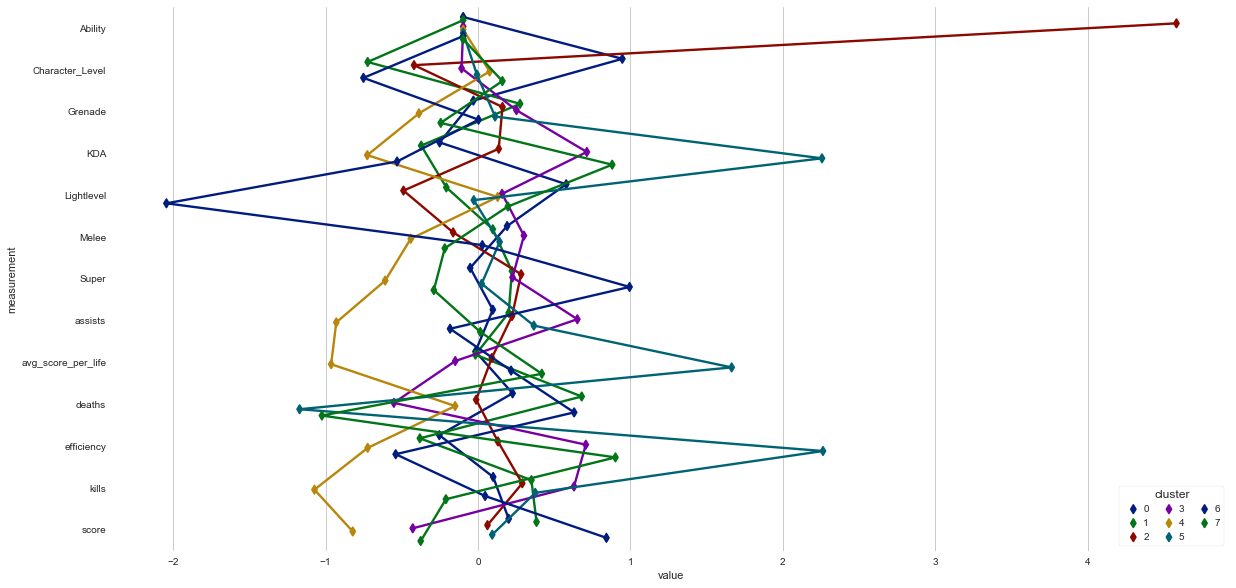

In [56]:
plt.rcParams["figure.figsize"] = (20,10)
plot_cluster_result(player_feature_df, 'cluster')

### Result Visualization 2

In [57]:
def plot_single_cluster(df, cluster_colname, cluster_num, color="#3160D6"):
    """plot guitar tab plot for a single cluster"""
    
    sns.set(style="whitegrid")

    # filter cluster data
    df = df[df[cluster_colname]==cluster_num].copy()
        
    # "Melt" the dataset to "long-form" or "tidy" representation
    df = pd.melt(df, cluster_colname, var_name="measurement")

    # Initialize the figure
    f, ax = plt.subplots()
    sns.despine(bottom=True, left=True)

    # Show the conditional means
    sns.pointplot(x="value", y="measurement", 
                  data=df, dodge=.532, join=False, 
                  markers="d", scale=.75, ci=None, color=color)#palette="dark",

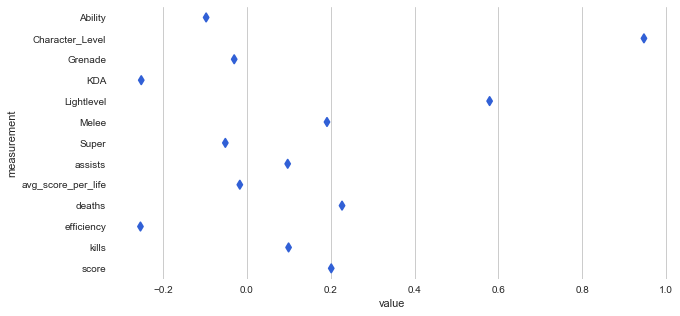

In [58]:
plt.rcParams["figure.figsize"] = (10,5)
plot_single_cluster(player_feature_df, 'cluster', 0)

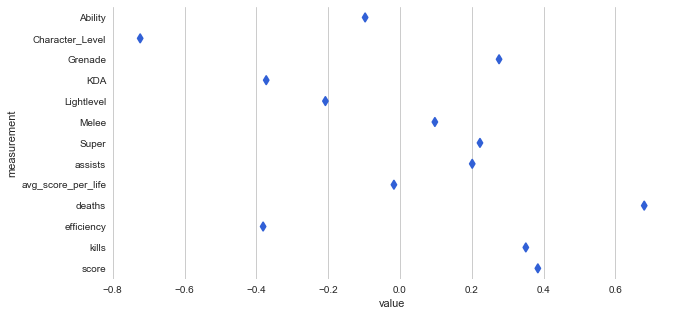

In [59]:
plot_single_cluster(player_feature_df, 'cluster', 1)

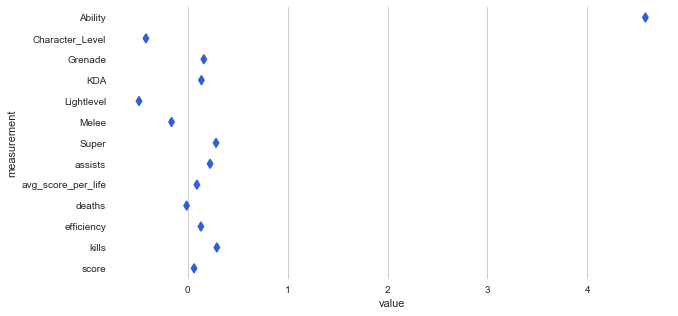

In [60]:
plot_single_cluster(player_feature_df, 'cluster', 2)

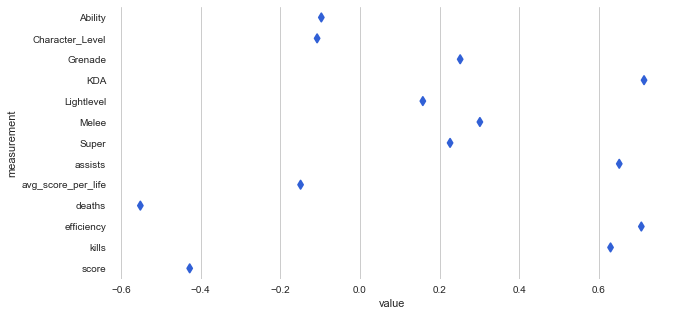

In [61]:
plot_single_cluster(player_feature_df, 'cluster', 3)

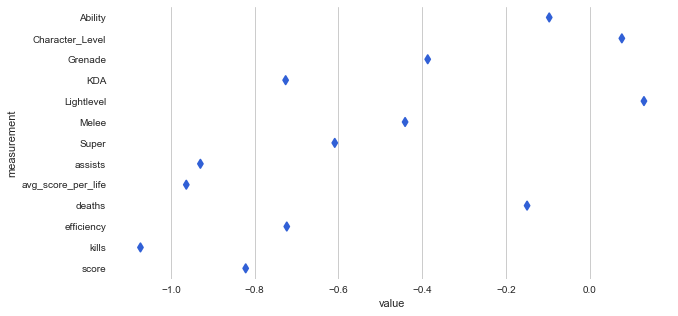

In [62]:
plot_single_cluster(player_feature_df, 'cluster', 4)

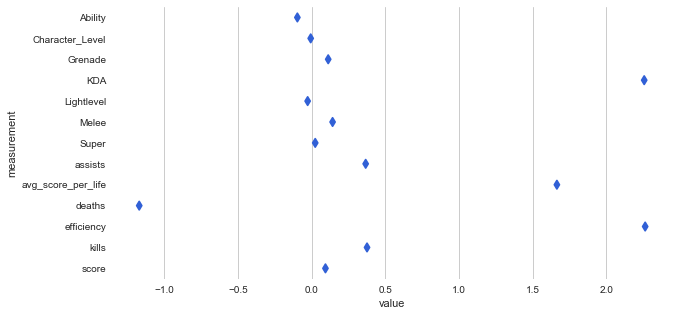

In [63]:
plot_single_cluster(player_feature_df, 'cluster', 5)

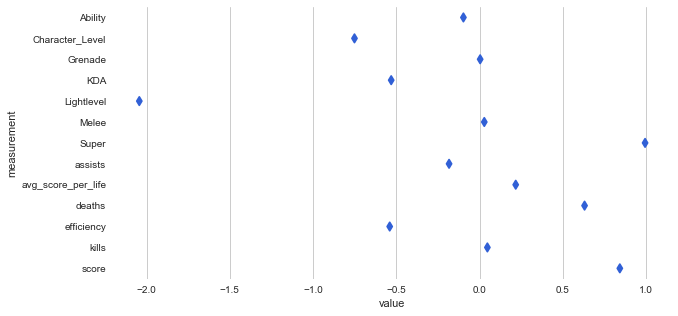

In [64]:
plot_single_cluster(player_feature_df, 'cluster', 6)

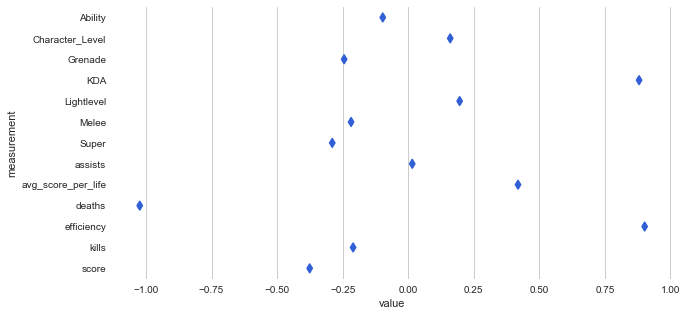

In [65]:
plot_single_cluster(player_feature_df, 'cluster', 7)

### Result Visualization 3 

In [66]:
def plot_cluster_facet(df, cluster_colname):
    """plot guitar tab plot for a single cluster"""
    
    sns.set(style="whitegrid")
        
    # "Melt" the dataset to "long-form" or "tidy" representation
    df = pd.melt(df, cluster_colname, var_name="measurement")

    # Show the conditional means
    g = sns.factorplot(x="value", y="measurement",
                   col="cluster",
                    data=df, kind="point",
                    dodge=False,
                    size=4, aspect=.7);#hue="smoker", 

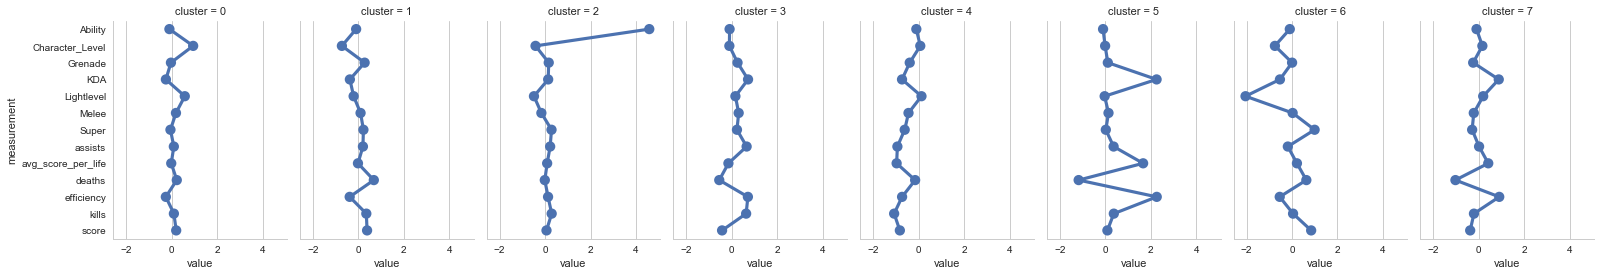

In [67]:
plot_cluster_facet(player_feature_df, 'cluster')

### Consider to use table2_4_5 to cluster 

In [68]:
#aggregate player's performance by weapon class
table2_4_5.head()

,playersID,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,...,Character_Class,referenceID,avg_uniqueWeaponKills,avg_uniqueWeaponKillsPrecisionKills,avg_uniqueWeaponPrecisionKills,reference_id,weapon_name,itemTypeDisplayName,itemTypeAndTierDisplayName,tierTypeName
0,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,...,Hunter,1911843791,3.5,0.000000,0.0,1911843791,Last Hope,Sidearm,Legendary Sidearm,Legendary
1,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,...,Hunter,3628991659,8.0,0.466667,4.0,3628991659,Vigilance Wing,Pulse Rifle,Exotic Pulse Rifle,Exotic
2,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,...,Hunter,1911843791,3.5,0.000000,0.0,1911843791,Last Hope,Sidearm,Legendary Sidearm,Legendary
3,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,...,Hunter,3628991659,8.0,0.466667,4.0,3628991659,Vigilance Wing,Pulse Rifle,Exotic Pulse Rifle,Exotic
4,2305843009260294077,0.0,20.0,0.0,1.714286,297.0,0.0,1.0,6.0,0.75000,...,Titan,1879212552,2.0,0.500000,1.0,1879212552,A Sudden Death,Shotgun,Legendary Shotgun,Legendary


In [69]:
table2_4_5=table2_4_5.drop(["Character_Class","referenceID","reference_id","weapon_name","itemTypeAndTierDisplayName","tierTypeName"],axis=1)

In [70]:
table2_4_5.head()

,playersID,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,score,avg_uniqueWeaponKills,avg_uniqueWeaponKillsPrecisionKills,avg_uniqueWeaponPrecisionKills,itemTypeDisplayName
0,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,13.0,1.515152,14.0,28.5,3.5,0.000000,0.0,Sidearm
1,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,13.0,1.515152,14.0,28.5,8.0,0.466667,4.0,Pulse Rifle
2,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,13.0,1.515152,14.0,28.5,3.5,0.000000,0.0,Sidearm
3,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,13.0,1.515152,14.0,28.5,8.0,0.466667,4.0,Pulse Rifle
4,2305843009260294077,0.0,20.0,0.0,1.714286,297.0,0.0,1.0,6.0,0.75000,7.0,2.142857,9.0,6.0,2.0,0.500000,1.0,Shotgun


In [71]:
table2_4_5.columns

Index(['playersID', 'Ability', 'Character_Level', 'Grenade', 'KDA',
       'Lightlevel', 'Melee', 'Super', 'assists', 'avg_score_per_life',
       'deaths', 'efficiency', 'kills', 'score', 'avg_uniqueWeaponKills',
       'avg_uniqueWeaponKillsPrecisionKills', 'avg_uniqueWeaponPrecisionKills',
       'itemTypeDisplayName'],
      dtype='object')

### groupby itemTypeDisplayName+playersID

In [72]:
table_player_weaponclass=table2_4_5.groupby(['playersID','itemTypeDisplayName']).agg({'avg_uniqueWeaponKills':"mean","avg_uniqueWeaponKillsPrecisionKills":"mean","avg_uniqueWeaponPrecisionKills":"mean"}).reset_index()

In [73]:
table_player_weaponclass.head()

,playersID,itemTypeDisplayName,avg_uniqueWeaponKills,avg_uniqueWeaponKillsPrecisionKills,avg_uniqueWeaponPrecisionKills
0,2305843009260294056,Pulse Rifle,8.0,0.466667,4.0
1,2305843009260294056,Sidearm,3.5,0.000000,0.0
2,2305843009260294077,Shotgun,2.0,0.500000,1.0
3,2305843009260294077,Submachine Gun,4.0,0.250000,1.0
4,2305843009260294317,Pulse Rifle,2.0,0.333333,0.5


In [74]:
#consider use only avg_uniqueWeaponKills as weapon performance matric
table_player_weaponclass=table_player_weaponclass.drop(["avg_uniqueWeaponKillsPrecisionKills","avg_uniqueWeaponPrecisionKills"],axis=1)

In [75]:
table_player_weaponclass.head()

,playersID,itemTypeDisplayName,avg_uniqueWeaponKills
0,2305843009260294056,Pulse Rifle,8.0
1,2305843009260294056,Sidearm,3.5
2,2305843009260294077,Shotgun,2.0
3,2305843009260294077,Submachine Gun,4.0
4,2305843009260294317,Pulse Rifle,2.0


In [76]:
len(table_player_weaponclass)

271477

In [77]:
table_player_weaponclass_pivot=table_player_weaponclass.pivot(columns='itemTypeDisplayName', values='avg_uniqueWeaponKills')

In [78]:
len(table_player_weaponclass_pivot)

271477

In [79]:
table_player_weaponclass_pivot["playersID"]=table_player_weaponclass["playersID"]
table_player_weaponclass_pivot.head()

itemTypeDisplayName,Auto Rifle,Fusion Rifle,Grenade Launcher,Hand Cannon,Linear Fusion Rifle,Pulse Rifle,Rocket Launcher,Scout Rifle,Shotgun,Sidearm,Sniper Rifle,Submachine Gun,Sword,Trace Rifle,playersID
0,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2305843009260294056
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,2305843009260294056
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2305843009260294077
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,2305843009260294077
4,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2305843009260294317


In [80]:
table_player_weaponclass_pivot=table_player_weaponclass_pivot.fillna(0)
#table_player_weaponclass_pivot=table_player_weaponclass_pivot.drop('itemTypeDisplayName')
table_player_weaponclass_pivot.head()

itemTypeDisplayName,Auto Rifle,Fusion Rifle,Grenade Launcher,Hand Cannon,Linear Fusion Rifle,Pulse Rifle,Rocket Launcher,Scout Rifle,Shotgun,Sidearm,Sniper Rifle,Submachine Gun,Sword,Trace Rifle,playersID
0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2305843009260294056
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,2305843009260294056
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2305843009260294077
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2305843009260294077
4,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2305843009260294317


In [81]:
table_player_weaponclass_pivot.columns

Index(['Auto Rifle', 'Fusion Rifle', 'Grenade Launcher', 'Hand Cannon',
       'Linear Fusion Rifle', 'Pulse Rifle', 'Rocket Launcher', 'Scout Rifle',
       'Shotgun', 'Sidearm', 'Sniper Rifle', 'Submachine Gun', 'Sword',
       'Trace Rifle', 'playersID'],
      dtype='object', name='itemTypeDisplayName')

### Aggregate weapon class table by players 

In [82]:
unique_table_player_weaponclass_pivot=table_player_weaponclass_pivot.groupby("playersID").agg({'Auto Rifle': "sum", 'Fusion Rifle': "sum", 'Grenade Launcher': "sum", 'Hand Cannon': "sum",
       'Linear Fusion Rifle': "sum", 'Pulse Rifle': "sum", 'Rocket Launcher': "sum", 'Scout Rifle': "sum",
       'Shotgun': "sum", 'Sidearm': "sum", 'Sniper Rifle': "sum", 'Submachine Gun': "sum", 'Sword': "sum",
       'Trace Rifle': "sum"}).reset_index()

In [83]:
unique_table_player_weaponclass_pivot.head()

,playersID,Auto Rifle,Fusion Rifle,Grenade Launcher,Hand Cannon,Linear Fusion Rifle,Pulse Rifle,Rocket Launcher,Scout Rifle,Shotgun,Sidearm,Sniper Rifle,Submachine Gun,Sword,Trace Rifle
0,2305843009260294056,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0
1,2305843009260294077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0
2,2305843009260294317,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0
3,2305843009260294521,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2305843009260294530,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0


In [84]:
#merge the pivot table back to table2_4_5
table2_4_5.columns

Index(['playersID', 'Ability', 'Character_Level', 'Grenade', 'KDA',
       'Lightlevel', 'Melee', 'Super', 'assists', 'avg_score_per_life',
       'deaths', 'efficiency', 'kills', 'score', 'avg_uniqueWeaponKills',
       'avg_uniqueWeaponKillsPrecisionKills', 'avg_uniqueWeaponPrecisionKills',
       'itemTypeDisplayName'],
      dtype='object')

### Aggregate  table2_4_5 in to unique player level

In [85]:
table2_4_5.head()

,playersID,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,score,avg_uniqueWeaponKills,avg_uniqueWeaponKillsPrecisionKills,avg_uniqueWeaponPrecisionKills,itemTypeDisplayName
0,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,13.0,1.515152,14.0,28.5,3.5,0.000000,0.0,Sidearm
1,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,13.0,1.515152,14.0,28.5,8.0,0.466667,4.0,Pulse Rifle
2,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,13.0,1.515152,14.0,28.5,3.5,0.000000,0.0,Sidearm
3,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,13.0,1.515152,14.0,28.5,8.0,0.466667,4.0,Pulse Rifle
4,2305843009260294077,0.0,20.0,0.0,1.714286,297.0,0.0,1.0,6.0,0.75000,7.0,2.142857,9.0,6.0,2.0,0.500000,1.0,Shotgun


In [86]:
table2_4_5_clean=table2_4_5[['playersID', 'Ability', 'Character_Level', 'Grenade', 'KDA',
       'Lightlevel', 'Melee', 'Super', 'assists', 'avg_score_per_life',
       'deaths', 'efficiency', 'kills', 'score']]

In [87]:
table2_4_5_clean.head()

,playersID,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,score
0,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,13.0,1.515152,14.0,28.5
1,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,13.0,1.515152,14.0,28.5
2,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,13.0,1.515152,14.0,28.5
3,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.03125,13.0,1.515152,14.0,28.5
4,2305843009260294077,0.0,20.0,0.0,1.714286,297.0,0.0,1.0,6.0,0.75000,7.0,2.142857,9.0,6.0


In [88]:
unique_table2_4_5_clean=table2_4_5_clean.groupby("playersID").agg({'Ability':"mean", 'Character_Level':"mean", 'Grenade':"mean", 'KDA':"mean",
       'Lightlevel':"mean", 'Melee':"mean", 'Super':"mean", 'assists':"mean", 'avg_score_per_life':"mean",
       'deaths':"mean", 'efficiency':"mean", 'kills':"mean", 'score':"mean"}).reset_index()

In [89]:
unique_table2_4_5_clean.head()

,playersID,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,efficiency,kills,score
0,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.031250,13.0,1.515152,14.0,28.5
1,2305843009260294077,0.0,20.0,0.0,1.714286,297.0,0.0,1.0,6.0,0.750000,7.0,2.142857,9.0,6.0
2,2305843009260294317,0.0,20.0,0.0,0.833333,301.0,1.0,0.0,3.0,0.900000,9.0,1.000000,6.0,9.0
3,2305843009260294521,0.0,20.0,0.0,0.833333,305.0,0.0,0.0,1.0,1.500000,9.0,0.888889,7.0,15.0
4,2305843009260294530,0.0,20.0,0.5,3.791667,303.0,1.0,0.0,1.5,1.357143,4.0,4.083333,13.0,5.5


In [90]:
final_cluster=pd.merge(unique_table2_4_5_clean,unique_table_player_weaponclass_pivot, how= "inner", on="playersID")
final_cluster.head()

,playersID,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,...,Linear Fusion Rifle,Pulse Rifle,Rocket Launcher,Scout Rifle,Shotgun,Sidearm,Sniper Rifle,Submachine Gun,Sword,Trace Rifle
0,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.031250,...,0.0,8.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0
1,2305843009260294077,0.0,20.0,0.0,1.714286,297.0,0.0,1.0,6.0,0.750000,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0
2,2305843009260294317,0.0,20.0,0.0,0.833333,301.0,1.0,0.0,3.0,0.900000,...,0.0,2.0,2.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0
3,2305843009260294521,0.0,20.0,0.0,0.833333,305.0,0.0,0.0,1.0,1.500000,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2305843009260294530,0.0,20.0,0.5,3.791667,303.0,1.0,0.0,1.5,1.357143,...,0.0,5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0


In [91]:
final_cluster_clean=final_cluster[pd.notnull(final_cluster["avg_score_per_life"])] #remove missing value
final_cluster_clean.head()

,playersID,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,...,Linear Fusion Rifle,Pulse Rifle,Rocket Launcher,Scout Rifle,Shotgun,Sidearm,Sniper Rifle,Submachine Gun,Sword,Trace Rifle
0,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.031250,...,0.0,8.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0
1,2305843009260294077,0.0,20.0,0.0,1.714286,297.0,0.0,1.0,6.0,0.750000,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0
2,2305843009260294317,0.0,20.0,0.0,0.833333,301.0,1.0,0.0,3.0,0.900000,...,0.0,2.0,2.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0
3,2305843009260294521,0.0,20.0,0.0,0.833333,305.0,0.0,0.0,1.0,1.500000,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2305843009260294530,0.0,20.0,0.5,3.791667,303.0,1.0,0.0,1.5,1.357143,...,0.0,5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0


In [92]:
final_cluster_clean.isnull().any() #contain na?

playersID              False
Ability                False
Character_Level        False
Grenade                False
KDA                    False
Lightlevel             False
Melee                  False
Super                  False
assists                False
avg_score_per_life     False
deaths                 False
efficiency             False
kills                  False
score                  False
Auto Rifle             False
Fusion Rifle           False
Grenade Launcher       False
Hand Cannon            False
Linear Fusion Rifle    False
Pulse Rifle            False
Rocket Launcher        False
Scout Rifle            False
Shotgun                False
Sidearm                False
Sniper Rifle           False
Submachine Gun         False
Sword                  False
Trace Rifle            False
dtype: bool

In [93]:
final_cluster_clean.columns

Index(['playersID', 'Ability', 'Character_Level', 'Grenade', 'KDA',
       'Lightlevel', 'Melee', 'Super', 'assists', 'avg_score_per_life',
       'deaths', 'efficiency', 'kills', 'score', 'Auto Rifle', 'Fusion Rifle',
       'Grenade Launcher', 'Hand Cannon', 'Linear Fusion Rifle', 'Pulse Rifle',
       'Rocket Launcher', 'Scout Rifle', 'Shotgun', 'Sidearm', 'Sniper Rifle',
       'Submachine Gun', 'Sword', 'Trace Rifle'],
      dtype='object')

In [94]:
final_cluster_clean.head()

,playersID,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,...,Linear Fusion Rifle,Pulse Rifle,Rocket Launcher,Scout Rifle,Shotgun,Sidearm,Sniper Rifle,Submachine Gun,Sword,Trace Rifle
0,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.031250,...,0.0,8.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0
1,2305843009260294077,0.0,20.0,0.0,1.714286,297.0,0.0,1.0,6.0,0.750000,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0
2,2305843009260294317,0.0,20.0,0.0,0.833333,301.0,1.0,0.0,3.0,0.900000,...,0.0,2.0,2.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0
3,2305843009260294521,0.0,20.0,0.0,0.833333,305.0,0.0,0.0,1.0,1.500000,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2305843009260294530,0.0,20.0,0.5,3.791667,303.0,1.0,0.0,1.5,1.357143,...,0.0,5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0


In [95]:
len(final_cluster_clean['playersID'].unique())

114740

In [96]:
#final_cluster_clean.to_csv("final_cluster_clean_2.csv")

### add percentage of kills for each weapon class 

In [97]:
final_cluster_clean.head()

,playersID,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,...,Linear Fusion Rifle,Pulse Rifle,Rocket Launcher,Scout Rifle,Shotgun,Sidearm,Sniper Rifle,Submachine Gun,Sword,Trace Rifle
0,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.031250,...,0.0,8.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0
1,2305843009260294077,0.0,20.0,0.0,1.714286,297.0,0.0,1.0,6.0,0.750000,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0
2,2305843009260294317,0.0,20.0,0.0,0.833333,301.0,1.0,0.0,3.0,0.900000,...,0.0,2.0,2.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0
3,2305843009260294521,0.0,20.0,0.0,0.833333,305.0,0.0,0.0,1.0,1.500000,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2305843009260294530,0.0,20.0,0.5,3.791667,303.0,1.0,0.0,1.5,1.357143,...,0.0,5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0


In [98]:
final_cluster_clean.columns

Index(['playersID', 'Ability', 'Character_Level', 'Grenade', 'KDA',
       'Lightlevel', 'Melee', 'Super', 'assists', 'avg_score_per_life',
       'deaths', 'efficiency', 'kills', 'score', 'Auto Rifle', 'Fusion Rifle',
       'Grenade Launcher', 'Hand Cannon', 'Linear Fusion Rifle', 'Pulse Rifle',
       'Rocket Launcher', 'Scout Rifle', 'Shotgun', 'Sidearm', 'Sniper Rifle',
       'Submachine Gun', 'Sword', 'Trace Rifle'],
      dtype='object')

In [99]:
final_cluster_clean["weapon_kills"]=final_cluster_clean['Auto Rifle']+final_cluster_clean['Fusion Rifle']+final_cluster_clean['Grenade Launcher']+final_cluster_clean['Hand Cannon']+final_cluster_clean['Linear Fusion Rifle']+final_cluster_clean['Pulse Rifle']+final_cluster_clean['Rocket Launcher']+final_cluster_clean['Scout Rifle']+final_cluster_clean['Shotgun']+final_cluster_clean['Sidearm']+final_cluster_clean['Sniper Rifle']+final_cluster_clean['Submachine Gun']+final_cluster_clean['Sword']+final_cluster_clean['Trace Rifle']

/Users/wangziwen/anaconda/envs/python2.7/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [100]:
final_cluster_clean.head()

,playersID,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,...,Pulse Rifle,Rocket Launcher,Scout Rifle,Shotgun,Sidearm,Sniper Rifle,Submachine Gun,Sword,Trace Rifle,weapon_kills
0,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.031250,...,8.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,11.5
1,2305843009260294077,0.0,20.0,0.0,1.714286,297.0,0.0,1.0,6.0,0.750000,...,0.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,6.0
2,2305843009260294317,0.0,20.0,0.0,0.833333,301.0,1.0,0.0,3.0,0.900000,...,2.0,2.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,8.5
3,2305843009260294521,0.0,20.0,0.0,0.833333,305.0,0.0,0.0,1.0,1.500000,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,2305843009260294530,0.0,20.0,0.5,3.791667,303.0,1.0,0.0,1.5,1.357143,...,5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,11.0


In [101]:
final_cluster_clean['Pro Auto Rifle']=final_cluster_clean['Auto Rifle']/final_cluster_clean['weapon_kills']
final_cluster_clean['Pro Fusion Rifle']=final_cluster_clean['Fusion Rifle']/final_cluster_clean['weapon_kills']
final_cluster_clean['Pro Grenade Launcher']=final_cluster_clean['Grenade Launcher']/final_cluster_clean['weapon_kills']
final_cluster_clean['Pro Hand Cannon']=final_cluster_clean['Hand Cannon']/final_cluster_clean['weapon_kills']
final_cluster_clean['Pro Linear Fusion Rifle']=final_cluster_clean['Linear Fusion Rifle']/final_cluster_clean['weapon_kills']
final_cluster_clean['Pro Pulse Rifle']=final_cluster_clean['Pulse Rifle']/final_cluster_clean['weapon_kills']
final_cluster_clean['Pro Rocket Launcher']=final_cluster_clean['Rocket Launcher']/final_cluster_clean['weapon_kills']
final_cluster_clean['Pro Scout Rifle']=final_cluster_clean['Scout Rifle']/final_cluster_clean['weapon_kills']
final_cluster_clean['Pro Shotgun']=final_cluster_clean['Shotgun']/final_cluster_clean['weapon_kills']
final_cluster_clean['Pro Sidearm']=final_cluster_clean['Sidearm']/final_cluster_clean['weapon_kills']
final_cluster_clean['Pro Sniper Rifle']=final_cluster_clean['Sniper Rifle']/final_cluster_clean['weapon_kills']
final_cluster_clean['Pro Submachine Gun']=final_cluster_clean['Submachine Gun']/final_cluster_clean['weapon_kills']
final_cluster_clean['Pro Sword']=final_cluster_clean['Sword']/final_cluster_clean['weapon_kills']
final_cluster_clean['Pro Trace Rifle']=final_cluster_clean['Trace Rifle']/final_cluster_clean['weapon_kills']


/Users/wangziwen/anaconda/envs/python2.7/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/wangziwen/anaconda/envs/python2.7/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/wangziwen/anaconda/envs/python2.7/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [102]:
final_cluster_clean.head()

,playersID,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,...,Pro Linear Fusion Rifle,Pro Pulse Rifle,Pro Rocket Launcher,Pro Scout Rifle,Pro Shotgun,Pro Sidearm,Pro Sniper Rifle,Pro Submachine Gun,Pro Sword,Pro Trace Rifle
0,2305843009260294056,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.031250,...,0.0,0.695652,0.000000,0.000000,0.000000,0.304348,0.0,0.000000,0.0,0.0
1,2305843009260294077,0.0,20.0,0.0,1.714286,297.0,0.0,1.0,6.0,0.750000,...,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,0.0,0.666667,0.0,0.0
2,2305843009260294317,0.0,20.0,0.0,0.833333,301.0,1.0,0.0,3.0,0.900000,...,0.0,0.235294,0.235294,0.000000,0.000000,0.529412,0.0,0.000000,0.0,0.0
3,2305843009260294521,0.0,20.0,0.0,0.833333,305.0,0.0,0.0,1.0,1.500000,...,0.0,0.000000,0.000000,0.333333,0.000000,0.000000,0.0,0.000000,0.0,0.0
4,2305843009260294530,0.0,20.0,0.5,3.791667,303.0,1.0,0.0,1.5,1.357143,...,0.0,0.454545,0.000000,0.000000,0.000000,0.545455,0.0,0.000000,0.0,0.0


In [103]:
final_cluster_clean.to_csv("final_cluster_clean_3.csv")

### Cluster the dataset with weapon class 

In [104]:
final_cluster_clean=pd.read_csv("final_cluster_clean_3.csv")

In [105]:
player_feature_df=final_cluster_clean.drop("playersID",axis=1)
player_feature_df=player_feature_df.drop("Unnamed: 0",axis=1)

In [106]:
player_feature_df.head()

,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,...,Pro Linear Fusion Rifle,Pro Pulse Rifle,Pro Rocket Launcher,Pro Scout Rifle,Pro Shotgun,Pro Sidearm,Pro Sniper Rifle,Pro Submachine Gun,Pro Sword,Pro Trace Rifle
0,0.0,20.0,0.5,1.296970,302.0,0.5,0.5,6.0,2.031250,13.0,...,0.0,0.695652,0.000000,0.000000,0.000000,0.304348,0.0,0.000000,0.0,0.0
1,0.0,20.0,0.0,1.714286,297.0,0.0,1.0,6.0,0.750000,7.0,...,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,0.0,0.666667,0.0,0.0
2,0.0,20.0,0.0,0.833333,301.0,1.0,0.0,3.0,0.900000,9.0,...,0.0,0.235294,0.235294,0.000000,0.000000,0.529412,0.0,0.000000,0.0,0.0
3,0.0,20.0,0.0,0.833333,305.0,0.0,0.0,1.0,1.500000,9.0,...,0.0,0.000000,0.000000,0.333333,0.000000,0.000000,0.0,0.000000,0.0,0.0
4,0.0,20.0,0.5,3.791667,303.0,1.0,0.0,1.5,1.357143,4.0,...,0.0,0.454545,0.000000,0.000000,0.000000,0.545455,0.0,0.000000,0.0,0.0


In [107]:
player_feature_df.describe()

,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,...,Pro Linear Fusion Rifle,Pro Pulse Rifle,Pro Rocket Launcher,Pro Scout Rifle,Pro Shotgun,Pro Sidearm,Pro Sniper Rifle,Pro Submachine Gun,Pro Sword,Pro Trace Rifle
count,114740.000000,114740.000000,114740.000000,114740.000000,114740.000000,114740.000000,114740.000000,114740.000000,114740.000000,114740.000000,...,114740.000000,114740.000000,114740.000000,114740.000000,114740.000000,114740.000000,114740.000000,114740.000000,114740.000000,114740.000000
mean,0.007504,21.406249,0.377470,1.557858,297.686676,0.454471,0.640523,3.237338,0.954103,8.702679,...,0.000424,0.052630,0.052809,0.198995,0.020604,0.061628,0.005535,0.098224,0.018439,0.014511
std,0.084399,3.015716,0.629831,1.798152,48.517537,0.741044,1.060239,2.256365,0.948416,4.003028,...,0.011987,0.174642,0.131087,0.270532,0.083338,0.167995,0.040712,0.209383,0.087154,0.105216
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.000000,0.642857,294.000000,0.000000,0.000000,1.777778,0.250000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,20.000000,0.000000,1.013889,303.000000,0.000000,0.000000,3.000000,0.750000,8.666667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,25.000000,0.666667,1.700000,322.000000,1.000000,1.000000,4.500000,1.384615,12.000000,...,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.012595,0.000000,0.000000
max,3.000000,25.000000,8.000000,26.500000,335.000000,11.000000,17.000000,19.000000,38.000000,28.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [108]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [109]:
player_feature_df = my_normal(player_feature_df)

In [110]:
player_feature_df.head()

,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,...,Pro Linear Fusion Rifle,Pro Pulse Rifle,Pro Rocket Launcher,Pro Scout Rifle,Pro Shotgun,Pro Sidearm,Pro Sniper Rifle,Pro Submachine Gun,Pro Sword,Pro Trace Rifle
0,0.0,0.8,0.0625,0.048942,0.901493,0.045455,0.029412,0.315789,0.053454,0.464286,...,0.0,0.695652,0.000000,0.000000,0.000000,0.304348,0.0,0.000000,0.0,0.0
1,0.0,0.8,0.0000,0.064690,0.886567,0.000000,0.058824,0.315789,0.019737,0.250000,...,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,0.0,0.666667,0.0,0.0
2,0.0,0.8,0.0000,0.031447,0.898507,0.090909,0.000000,0.157895,0.023684,0.321429,...,0.0,0.235294,0.235294,0.000000,0.000000,0.529412,0.0,0.000000,0.0,0.0
3,0.0,0.8,0.0000,0.031447,0.910448,0.000000,0.000000,0.052632,0.039474,0.321429,...,0.0,0.000000,0.000000,0.333333,0.000000,0.000000,0.0,0.000000,0.0,0.0
4,0.0,0.8,0.0625,0.143082,0.904478,0.090909,0.000000,0.078947,0.035714,0.142857,...,0.0,0.454545,0.000000,0.000000,0.000000,0.545455,0.0,0.000000,0.0,0.0


In [111]:
# Fit a GMM model
clf = mixture.GaussianMixture(n_components=6, covariance_type='full')
clf.fit(player_feature_df)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=6, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [112]:
# Get the predicted group
pd.Series(clf.predict(player_feature_df)).value_counts()

1    44205
0    24876
2    24105
5     9188
3     6985
4     5381
dtype: int64

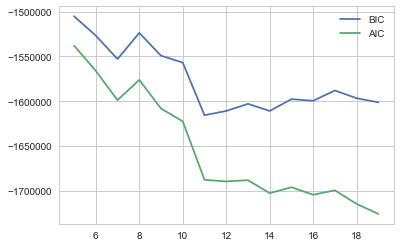

In [357]:
n_components = np.arange(5, 20)
clfs = [mixture.GaussianMixture(n_components=n, covariance_type='full').fit(player_feature_df) for n in n_components]
bics = [clf_temp.bic(player_feature_df) for clf_temp in clfs]
aics = [clf_temp.aic(player_feature_df) for clf_temp in clfs]

plt.plot(n_components, bics, label='BIC')
plt.plot(n_components, aics, label='AIC')
plt.legend();

In [113]:
player_feature_df = player_feature_df.copy()

In [114]:
player_feature_df['cluster'] = clf.predict(player_feature_df)

In [115]:
player_feature_df.head()

,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,...,Pro Pulse Rifle,Pro Rocket Launcher,Pro Scout Rifle,Pro Shotgun,Pro Sidearm,Pro Sniper Rifle,Pro Submachine Gun,Pro Sword,Pro Trace Rifle,cluster
0,0.0,0.8,0.0625,0.048942,0.901493,0.045455,0.029412,0.315789,0.053454,0.464286,...,0.695652,0.000000,0.000000,0.000000,0.304348,0.0,0.000000,0.0,0.0,5
1,0.0,0.8,0.0000,0.064690,0.886567,0.000000,0.058824,0.315789,0.019737,0.250000,...,0.000000,0.000000,0.000000,0.333333,0.000000,0.0,0.666667,0.0,0.0,0
2,0.0,0.8,0.0000,0.031447,0.898507,0.090909,0.000000,0.157895,0.023684,0.321429,...,0.235294,0.235294,0.000000,0.000000,0.529412,0.0,0.000000,0.0,0.0,3
3,0.0,0.8,0.0000,0.031447,0.910448,0.000000,0.000000,0.052632,0.039474,0.321429,...,0.000000,0.000000,0.333333,0.000000,0.000000,0.0,0.000000,0.0,0.0,1
4,0.0,0.8,0.0625,0.143082,0.904478,0.090909,0.000000,0.078947,0.035714,0.142857,...,0.454545,0.000000,0.000000,0.000000,0.545455,0.0,0.000000,0.0,0.0,5


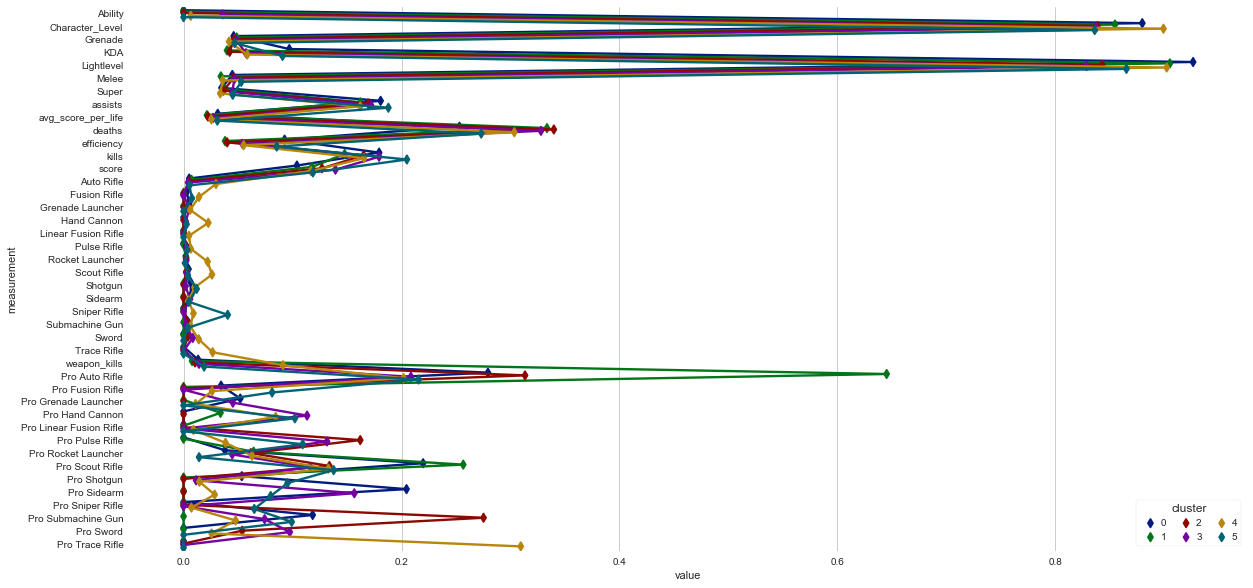

In [116]:
#Result Visualization 1
plt.rcParams["figure.figsize"] = (20,10)
plot_cluster_result(player_feature_df, 'cluster')

In [117]:
#Initializes plotting library and functions for 3D scatter plots 
from pyspark.ml.feature import VectorAssembler
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_classification, make_regression
from sklearn.externals import six
import pandas as pd
import numpy as np
import argparse
import json
import re
import os
import sys
import plotly
import plotly.graph_objs as go
#plotly.offline.init_notebook_mode()

In [118]:
# split df into cluster groups
grouped = player_feature_df.groupby(['cluster'], sort=True)

# compute sums for every column in every group
means = grouped.mean()
means

,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,...,Pro Linear Fusion Rifle,Pro Pulse Rifle,Pro Rocket Launcher,Pro Scout Rifle,Pro Shotgun,Pro Sidearm,Pro Sniper Rifle,Pro Submachine Gun,Pro Sword,Pro Trace Rifle
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.879708,0.045977,0.097022,0.926320,0.044737,0.034797,0.180831,0.031349,0.253180,...,0.00000,0.000000,0.038019,0.219799,0.053416,0.204564,0.000000,0.118469,0.000000,0.000000
1,0.000000,0.854632,0.048775,0.039882,0.904992,0.034245,0.037676,0.162191,0.021444,0.333473,...,0.00000,0.000000,0.064346,0.256634,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.838539,0.046485,0.042293,0.843002,0.046011,0.036667,0.169366,0.022485,0.339752,...,0.00000,0.162104,0.061728,0.133815,0.000000,0.000000,0.000000,0.275248,0.053785,0.000000
3,0.036004,0.837620,0.048399,0.057299,0.828603,0.046562,0.044771,0.171886,0.027113,0.327920,...,0.00000,0.131619,0.044678,0.116542,0.011512,0.156671,0.000000,0.074360,0.097455,0.000000
4,0.006602,0.899127,0.041804,0.058431,0.902102,0.035931,0.033661,0.162103,0.025456,0.303493,...,0.00905,0.038487,0.062837,0.132897,0.014517,0.028564,0.007223,0.047791,0.025731,0.309421
5,0.000000,0.836041,0.046852,0.090837,0.865155,0.052917,0.045098,0.187922,0.030988,0.273154,...,0.00000,0.109353,0.014259,0.137760,0.095427,0.079934,0.064888,0.099230,0.000000,0.000000


In [119]:
means.columns

Index(['Ability', 'Character_Level', 'Grenade', 'KDA', 'Lightlevel', 'Melee',
       'Super', 'assists', 'avg_score_per_life', 'deaths', 'efficiency',
       'kills', 'score', 'Auto Rifle', 'Fusion Rifle', 'Grenade Launcher',
       'Hand Cannon', 'Linear Fusion Rifle', 'Pulse Rifle', 'Rocket Launcher',
       'Scout Rifle', 'Shotgun', 'Sidearm', 'Sniper Rifle', 'Submachine Gun',
       'Sword', 'Trace Rifle', 'weapon_kills', 'Pro Auto Rifle',
       'Pro Fusion Rifle', 'Pro Grenade Launcher', 'Pro Hand Cannon',
       'Pro Linear Fusion Rifle', 'Pro Pulse Rifle', 'Pro Rocket Launcher',
       'Pro Scout Rifle', 'Pro Shotgun', 'Pro Sidearm', 'Pro Sniper Rifle',
       'Pro Submachine Gun', 'Pro Sword', 'Pro Trace Rifle'],
      dtype='object')

In [120]:
data = [go.Heatmap( z=means.values.tolist(), 
                   y=['Persona A', 'Persona B', 'Persona C', 'Persona D', 'Persona E', 'Persona F'],
                   x=['Ability', 'Character_Level', 'Grenade', 'KDA', 'Lightlevel', 'Melee',
       'Super', 'assists', 'avg_score_per_life', 'deaths', 'efficiency',
       'kills', 'score', 'Auto Rifle', 'Fusion Rifle', 'Grenade Launcher',
       'Hand Cannon', 'Linear Fusion Rifle', 'Pulse Rifle', 'Rocket Launcher',
       'Scout Rifle', 'Shotgun', 'Sidearm', 'Sniper Rifle', 'Submachine Gun',
       'Sword', 'Trace Rifle'
                     ],
                   colorscale='Viridis')]

In [122]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0
plot(data)

2.5.0


'file:///Users/wangziwen/Desktop/Northwestern_Sem_3/destiny/final_data_cluster/temp-plot.html'

In [123]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
iplot(data)

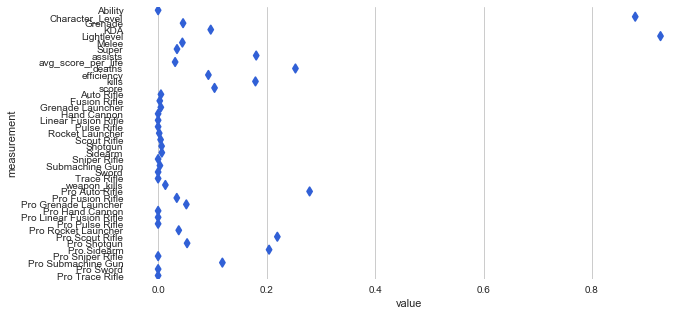

In [124]:
#Result Visualization 2
plt.rcParams["figure.figsize"] = (10,5)
plot_single_cluster(player_feature_df, 'cluster', 0)

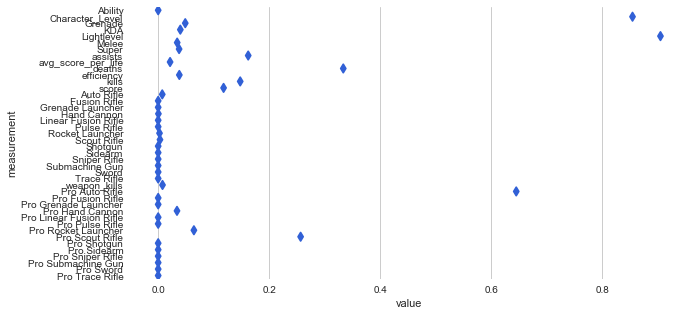

In [125]:
plot_single_cluster(player_feature_df, 'cluster', 1)

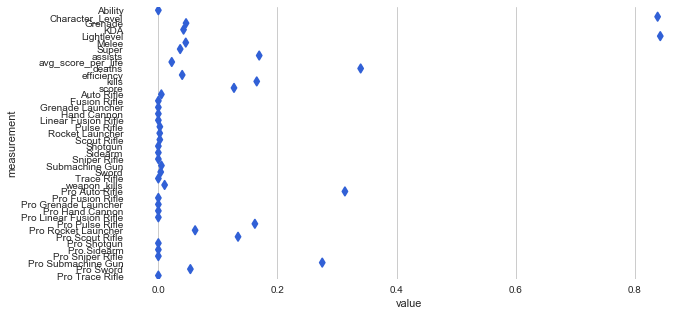

In [126]:
plot_single_cluster(player_feature_df, 'cluster', 2)

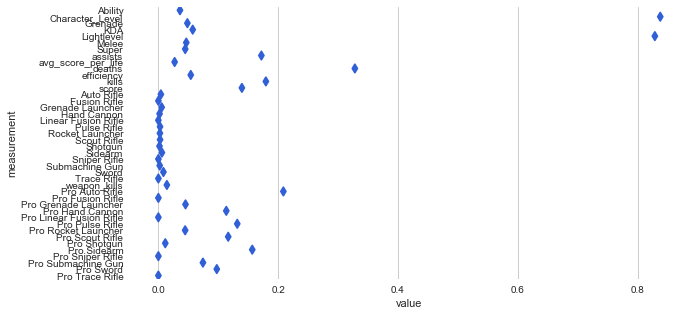

In [127]:
plot_single_cluster(player_feature_df, 'cluster', 3)

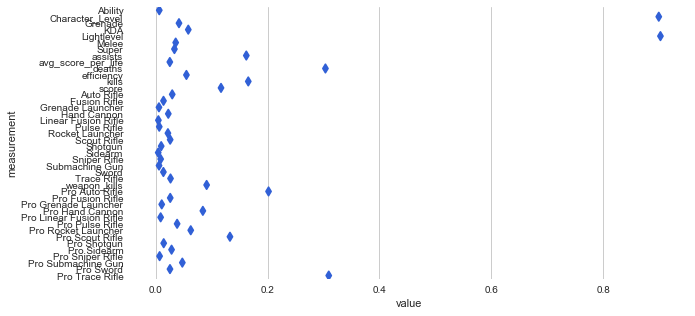

In [128]:
plot_single_cluster(player_feature_df, 'cluster', 4)

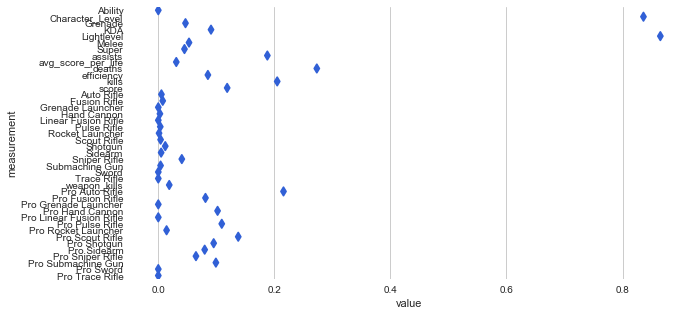

In [129]:
plot_single_cluster(player_feature_df, 'cluster', 5)

KeyboardInterrupt: 

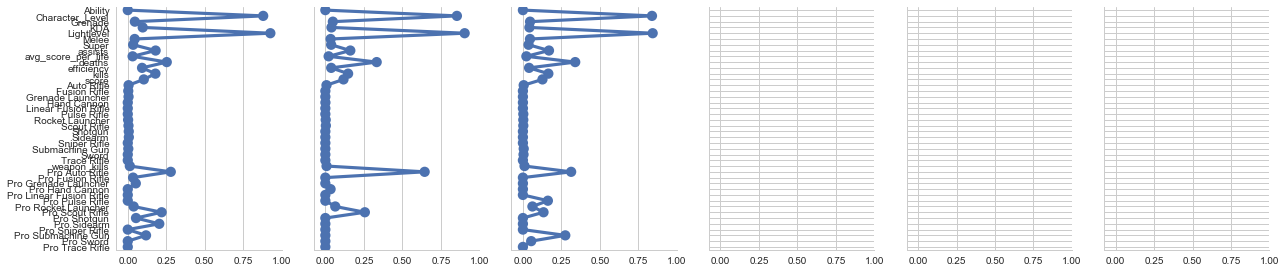

In [130]:
#Result Visualization 3
plt.rcParams["figure.figsize"] = (20,10)
plot_cluster_facet(player_feature_df, 'cluster')

In [131]:
plt.rcParams["figure.figsize"] = (10,5)

### cluster player performance features 

In [166]:
player_feature_df.columns

Index(['Ability', 'Character_Level', 'Grenade', 'KDA', 'Lightlevel', 'Melee',
       'Super', 'assists', 'avg_score_per_life', 'deaths', 'efficiency',
       'kills', 'score', 'Auto Rifle', 'Fusion Rifle', 'Grenade Launcher',
       'Hand Cannon', 'Linear Fusion Rifle', 'Pulse Rifle', 'Rocket Launcher',
       'Scout Rifle', 'Shotgun', 'Sidearm', 'Sniper Rifle', 'Submachine Gun',
       'Sword', 'Trace Rifle', 'weapon_kills', 'Pro Auto Rifle',
       'Pro Fusion Rifle', 'Pro Grenade Launcher', 'Pro Hand Cannon',
       'Pro Linear Fusion Rifle', 'Pro Pulse Rifle', 'Pro Rocket Launcher',
       'Pro Scout Rifle', 'Pro Shotgun', 'Pro Sidearm', 'Pro Sniper Rifle',
       'Pro Submachine Gun', 'Pro Sword', 'Pro Trace Rifle', 'cluster'],
      dtype='object')

In [167]:
performance_cluster=player_feature_df[['Ability', 'Grenade', 'KDA', 'Melee',
       'Super', 'assists', 'avg_score_per_life', 'deaths', 'efficiency',
       'kills', 'score']]

In [169]:
# Fit a GMM model
clf = mixture.GaussianMixture(n_components=6, covariance_type='full')
clf.fit(performance_cluster)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=6, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [170]:
performance_cluster = performance_cluster.copy()
performance_cluster['performance_cluster'] = clf.predict(performance_cluster)

In [173]:
performance_cluster.shape

(114740, 12)

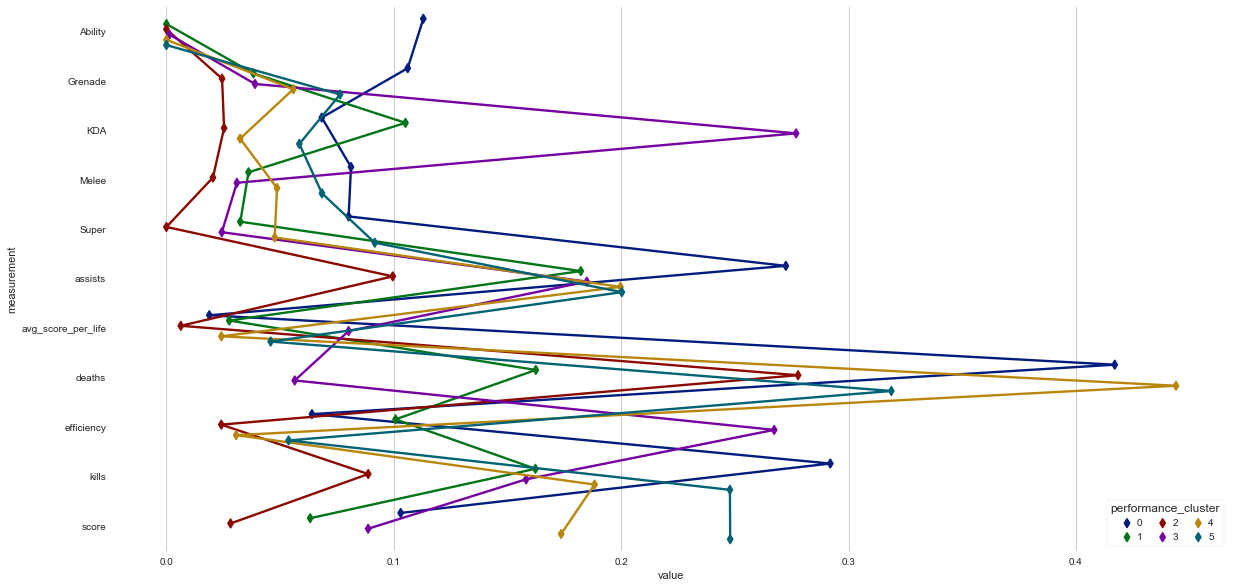

In [171]:
plt.rcParams["figure.figsize"] = (20,10)
plot_cluster_result(performance_cluster, 'performance_cluster')

In [172]:
# split df into cluster groups
grouped = performance_cluster.groupby(['performance_cluster'], sort=True)

# compute sums for every column in every group
means = grouped.mean()
means

data = [go.Heatmap( z=means.values.tolist(), 
                   y=['Persona A', 'Persona B', 'Persona C', 'Persona D', 'Persona E', 'Persona F'],
                   x=['Ability', 'Grenade', 'KDA','Melee',
       'Super', 'assists', 'avg_score_per_life', 'deaths', 'efficiency',
       'kills', 'score'
                     ],
                   colorscale='Viridis')]

In [426]:
plot(data)

'file:///Users/wangziwen/Desktop/Northwestern_Sem_3/destiny/sample_data/temp-plot.html'

In [138]:
init_notebook_mode(connected=True)
iplot(data)

### Cluster Weapon Class Kills 

In [153]:
weapon_kills_cluster=player_feature_df[['Auto Rifle', 'Fusion Rifle', 'Grenade Launcher',
       'Hand Cannon', 'Linear Fusion Rifle', 'Pulse Rifle', 'Rocket Launcher',
       'Scout Rifle', 'Shotgun', 'Sidearm', 'Sniper Rifle', 'Submachine Gun',
       'Sword', 'Trace Rifle']]

In [154]:
# Fit a GMM model
clf = mixture.GaussianMixture(n_components=6, covariance_type='full')
clf.fit(weapon_kills_cluster)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=6, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [155]:
weapon_kills_cluster = weapon_kills_cluster.copy()
weapon_kills_cluster['weapon_cluster'] = clf.predict(weapon_kills_cluster)

In [156]:
weapon_kills_cluster.head()

,Auto Rifle,Fusion Rifle,Grenade Launcher,Hand Cannon,Linear Fusion Rifle,Pulse Rifle,Rocket Launcher,Scout Rifle,Shotgun,Sidearm,Sniper Rifle,Submachine Gun,Sword,Trace Rifle,weapon_cluster
0,0.000000,0.0,0.0,0.0,0.0,0.022222,0.000000,0.000000,0.000000,0.015909,0.0,0.000000,0.0,0.0,4
1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.028986,0.000000,0.0,0.012195,0.0,0.0,2
2,0.000000,0.0,0.0,0.0,0.0,0.005556,0.011765,0.000000,0.000000,0.020455,0.0,0.000000,0.0,0.0,3
3,0.008753,0.0,0.0,0.0,0.0,0.000000,0.000000,0.005128,0.000000,0.000000,0.0,0.000000,0.0,0.0,0
4,0.000000,0.0,0.0,0.0,0.0,0.013889,0.000000,0.000000,0.000000,0.027273,0.0,0.000000,0.0,0.0,4


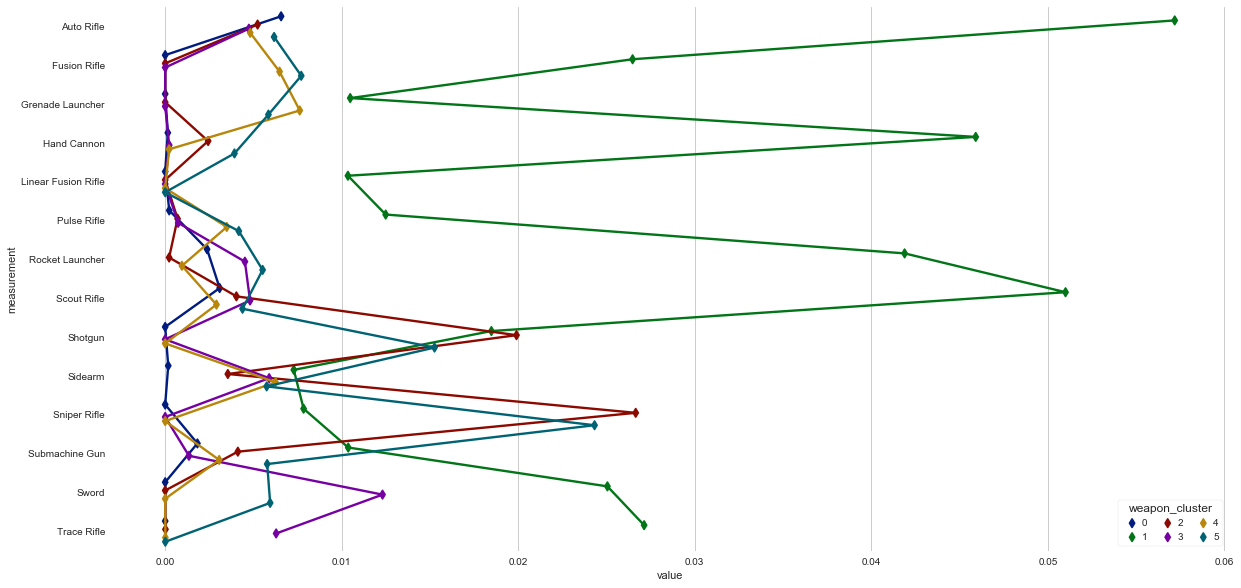

In [157]:
plt.rcParams["figure.figsize"] = (20,10)
plot_cluster_result(weapon_kills_cluster, 'weapon_cluster')

In [158]:
# split df into cluster groups
grouped = weapon_kills_cluster.groupby(['weapon_cluster'], sort=True)

# compute sums for every column in every group
means = grouped.mean()
means

data = [go.Heatmap( z=means.values.tolist(), 
                   y=['Persona A', 'Persona B', 'Persona C', 'Persona D', 'Persona E', 'Persona F'],
                   x=['Auto Rifle', 'Fusion Rifle', 'Grenade Launcher',
       'Hand Cannon', 'Linear Fusion Rifle', 'Pulse Rifle', 'Rocket Launcher',
       'Scout Rifle', 'Shotgun', 'Sidearm', 'Sniper Rifle', 'Submachine Gun',
       'Sword', 'Trace Rifle'
                     ],
                   colorscale='Viridis')]

In [413]:
plot(data)

'file:///Users/wangziwen/Desktop/Northwestern_Sem_3/destiny/sample_data/temp-plot.html'

In [144]:
init_notebook_mode(connected=True)
iplot(data)

### Cluster Weapon Percentage 

In [159]:
pro_weapon_cluster=player_feature_df[['Pro Auto Rifle',
       'Pro Fusion Rifle', 'Pro Grenade Launcher', 'Pro Hand Cannon',
       'Pro Linear Fusion Rifle', 'Pro Pulse Rifle', 'Pro Rocket Launcher',
       'Pro Scout Rifle', 'Pro Shotgun', 'Pro Sidearm', 'Pro Sniper Rifle',
       'Pro Submachine Gun', 'Pro Sword', 'Pro Trace Rifle']]

In [160]:
# Fit a GMM model
clf = mixture.GaussianMixture(n_components=6, covariance_type='full')
clf.fit(pro_weapon_cluster)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=6, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [161]:
pro_weapon_cluster = pro_weapon_cluster.copy()
pro_weapon_cluster['weapon_pro_cluster'] = clf.predict(pro_weapon_cluster)

In [165]:
pro_weapon_cluster.shape

(114740, 15)

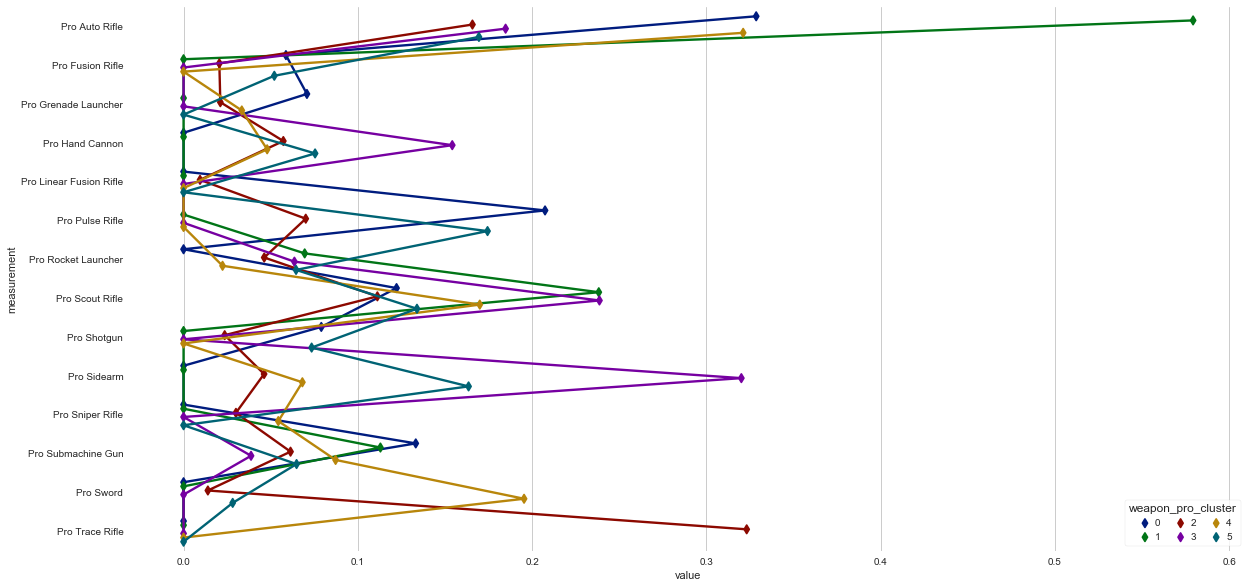

In [163]:
plt.rcParams["figure.figsize"] = (20,10)
plot_cluster_result(pro_weapon_cluster, 'weapon_pro_cluster')

In [164]:
# split df into cluster groups
grouped = pro_weapon_cluster.groupby(['weapon_pro_cluster'], sort=True)

# compute sums for every column in every group
means = grouped.mean()
means

data = [go.Heatmap( z=means.values.tolist(), 
                   y=['Persona A', 'Persona B', 'Persona C', 'Persona D', 'Persona E', 'Persona F'],
                   x=['Pro Auto Rifle',
       'Pro Fusion Rifle', 'Pro Grenade Launcher', 'Pro Hand Cannon',
       'Pro Linear Fusion Rifle', 'Pro Pulse Rifle', 'Pro Rocket Launcher',
       'Pro Scout Rifle', 'Pro Shotgun', 'Pro Sidearm', 'Pro Sniper Rifle',
       'Pro Submachine Gun', 'Pro Sword', 'Pro Trace Rifle'
                     ],
                   colorscale='Viridis')]

In [419]:
plot(data)

'file:///Users/wangziwen/Desktop/Northwestern_Sem_3/destiny/sample_data/temp-plot.html'

In [150]:
init_notebook_mode(connected=True)
iplot(data)

### lable cluster to players 

In [174]:
lable_data=player_feature_df.copy()

In [176]:
lable_data.head()

,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,...,Pro Pulse Rifle,Pro Rocket Launcher,Pro Scout Rifle,Pro Shotgun,Pro Sidearm,Pro Sniper Rifle,Pro Submachine Gun,Pro Sword,Pro Trace Rifle,cluster
0,0.0,0.8,0.0625,0.048942,0.901493,0.045455,0.029412,0.315789,0.053454,0.464286,...,0.695652,0.000000,0.000000,0.000000,0.304348,0.0,0.000000,0.0,0.0,5
1,0.0,0.8,0.0000,0.064690,0.886567,0.000000,0.058824,0.315789,0.019737,0.250000,...,0.000000,0.000000,0.000000,0.333333,0.000000,0.0,0.666667,0.0,0.0,0
2,0.0,0.8,0.0000,0.031447,0.898507,0.090909,0.000000,0.157895,0.023684,0.321429,...,0.235294,0.235294,0.000000,0.000000,0.529412,0.0,0.000000,0.0,0.0,3
3,0.0,0.8,0.0000,0.031447,0.910448,0.000000,0.000000,0.052632,0.039474,0.321429,...,0.000000,0.000000,0.333333,0.000000,0.000000,0.0,0.000000,0.0,0.0,1
4,0.0,0.8,0.0625,0.143082,0.904478,0.090909,0.000000,0.078947,0.035714,0.142857,...,0.454545,0.000000,0.000000,0.000000,0.545455,0.0,0.000000,0.0,0.0,5


In [178]:
lable_data=lable_data.drop("cluster",axis=1)

In [179]:
lable_data["performance_cluster"]=performance_cluster["performance_cluster"]

In [181]:
lable_data["weapon_pro_cluster"]=pro_weapon_cluster["weapon_pro_cluster"]

In [182]:
lable_data.head()

,Ability,Character_Level,Grenade,KDA,Lightlevel,Melee,Super,assists,avg_score_per_life,deaths,...,Pro Rocket Launcher,Pro Scout Rifle,Pro Shotgun,Pro Sidearm,Pro Sniper Rifle,Pro Submachine Gun,Pro Sword,Pro Trace Rifle,performance_cluster,weapon_pro_cluster
0,0.0,0.8,0.0625,0.048942,0.901493,0.045455,0.029412,0.315789,0.053454,0.464286,...,0.000000,0.000000,0.000000,0.304348,0.0,0.000000,0.0,0.0,4,5
1,0.0,0.8,0.0000,0.064690,0.886567,0.000000,0.058824,0.315789,0.019737,0.250000,...,0.000000,0.000000,0.333333,0.000000,0.0,0.666667,0.0,0.0,1,0
2,0.0,0.8,0.0000,0.031447,0.898507,0.090909,0.000000,0.157895,0.023684,0.321429,...,0.235294,0.000000,0.000000,0.529412,0.0,0.000000,0.0,0.0,4,5
3,0.0,0.8,0.0000,0.031447,0.910448,0.000000,0.000000,0.052632,0.039474,0.321429,...,0.000000,0.333333,0.000000,0.000000,0.0,0.000000,0.0,0.0,4,1
4,0.0,0.8,0.0625,0.143082,0.904478,0.090909,0.000000,0.078947,0.035714,0.142857,...,0.000000,0.000000,0.000000,0.545455,0.0,0.000000,0.0,0.0,1,5


In [185]:
lable_data.to_csv("label_data.csv")